# Covid-19 Data visualizations of vaccinations across the countries

In [ ]:
#libraries needed:
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for visualization
import matplotlib.pyplot as plt 
import plotly.express as ex

plt.style.use('fivethirtyeight')
%matplotlib inline

## Reading the dataset. The dataset that has been used here was taken from Kaggle "COVID-19 World Vaccination progress"

In [7]:
#Reading the dataset:
all_countries = pd.read_csv('country_vaccinations.csv')
all_countries

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,Zimbabwe,ZWE,2021-04-06,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
10885,Zimbabwe,ZWE,2021-04-07,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03,0.18,841.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
10886,Zimbabwe,ZWE,2021-04-08,193677.0,166543.0,27134.0,14260.0,12624.0,1.30,1.12,0.18,849.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
10887,Zimbabwe,ZWE,2021-04-09,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...


In [8]:
#looking into the data and its data type:
all_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              10889 non-null  object 
 1   iso_code                             10889 non-null  object 
 2   date                                 10889 non-null  object 
 3   total_vaccinations                   6575 non-null   float64
 4   people_vaccinated                    5926 non-null   float64
 5   people_fully_vaccinated              4223 non-null   float64
 6   daily_vaccinations_raw               5507 non-null   float64
 7   daily_vaccinations                   10695 non-null  float64
 8   total_vaccinations_per_hundred       6575 non-null   float64
 9   people_vaccinated_per_hundred        5926 non-null   float64
 10  people_fully_vaccinated_per_hundred  4223 non-null   float64
 11  daily_vaccinations_per_milli

In [9]:
#removing the duplicate countries: considering only UK and ignoring England, scotland, wales and northern island
final_countries = all_countries.country.unique().tolist()
print(final_countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Faeroe Islands', 'Falkland Islands', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'K

In [12]:
len(final_countries) #total countries

175

In [13]:
#calculating the daily vaccinations:
daily_vaccine = all_countries.loc[:,['country','date','vaccines','daily_vaccinations']].dropna(subset=['daily_vaccinations'])

In [16]:
daily_vaccine

,country,date,vaccines,daily_vaccinations
1,Afghanistan,2021-02-23,Oxford/AstraZeneca,1367.0
2,Afghanistan,2021-02-24,Oxford/AstraZeneca,1367.0
3,Afghanistan,2021-02-25,Oxford/AstraZeneca,1367.0
4,Afghanistan,2021-02-26,Oxford/AstraZeneca,1367.0
5,Afghanistan,2021-02-27,Oxford/AstraZeneca,1367.0
...,...,...,...,...
10884,Zimbabwe,2021-04-06,Sinopharm/Beijing,10967.0
10885,Zimbabwe,2021-04-07,Sinopharm/Beijing,12505.0
10886,Zimbabwe,2021-04-08,Sinopharm/Beijing,12624.0
10887,Zimbabwe,2021-04-09,Sinopharm/Beijing,11636.0


In [17]:
#converting the date
daily_vaccine['date'] = pd.to_datetime(daily_vaccine['date'], format = '%Y-%m-%d')

In [18]:
daily_vaccine

,country,date,vaccines,daily_vaccinations
1,Afghanistan,2021-02-23,Oxford/AstraZeneca,1367.0
2,Afghanistan,2021-02-24,Oxford/AstraZeneca,1367.0
3,Afghanistan,2021-02-25,Oxford/AstraZeneca,1367.0
4,Afghanistan,2021-02-26,Oxford/AstraZeneca,1367.0
5,Afghanistan,2021-02-27,Oxford/AstraZeneca,1367.0
...,...,...,...,...
10884,Zimbabwe,2021-04-06,Sinopharm/Beijing,10967.0
10885,Zimbabwe,2021-04-07,Sinopharm/Beijing,12505.0
10886,Zimbabwe,2021-04-08,Sinopharm/Beijing,12624.0
10887,Zimbabwe,2021-04-09,Sinopharm/Beijing,11636.0


In [19]:
#finding the daily vaccinations count across the countries:
daily_aggreated_vaccines = daily_vaccine.groupby('country').daily_vaccinations.agg(
                            sum_vaccinations = 'sum',
                            average_vaccinations = 'mean')

In [21]:
complete_daily_vaccinations = daily_vaccine.merge(daily_aggreated_vaccines, on = 'country')
complete_daily_vaccinations

,country,date,vaccines,daily_vaccinations,sum_vaccinations,average_vaccinations
0,Afghanistan,2021-02-23,Oxford/AstraZeneca,1367.0,115096.0,2615.818182
1,Afghanistan,2021-02-24,Oxford/AstraZeneca,1367.0,115096.0,2615.818182
2,Afghanistan,2021-02-25,Oxford/AstraZeneca,1367.0,115096.0,2615.818182
3,Afghanistan,2021-02-26,Oxford/AstraZeneca,1367.0,115096.0,2615.818182
4,Afghanistan,2021-02-27,Oxford/AstraZeneca,1367.0,115096.0,2615.818182
...,...,...,...,...,...,...
10690,Zimbabwe,2021-04-06,Sinopharm/Beijing,10967.0,179698.0,3523.490196
10691,Zimbabwe,2021-04-07,Sinopharm/Beijing,12505.0,179698.0,3523.490196
10692,Zimbabwe,2021-04-08,Sinopharm/Beijing,12624.0,179698.0,3523.490196
10693,Zimbabwe,2021-04-09,Sinopharm/Beijing,11636.0,179698.0,3523.490196


Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by mean values)')

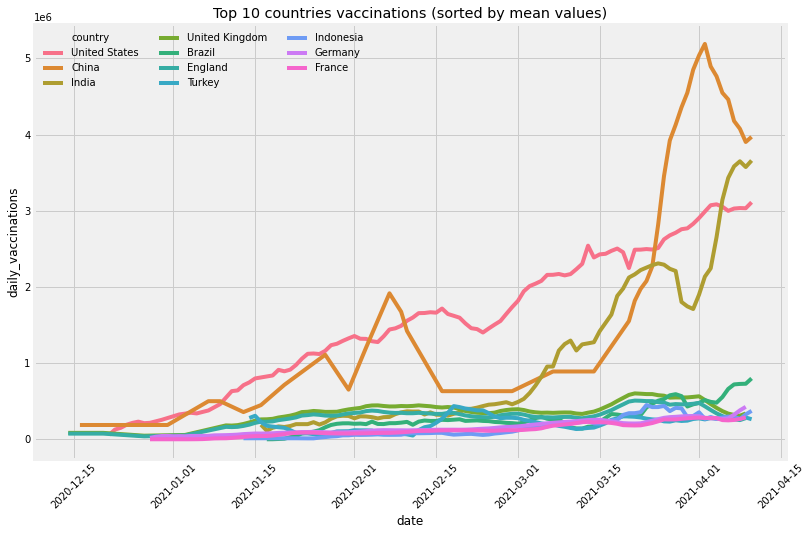

In [27]:
#plotting the top 10 countries: sorting by the mean values
#aggregating and finding out the top countries that are vaccinating
top_countries = daily_aggreated_vaccines.sort_values(by = 'average_vaccinations', ascending = False).reset_index()
countries = top_countries.country.to_list()


mean = complete_daily_vaccinations.sort_values(by = 'average_vaccinations', ascending = False)
top10_mean = mean[mean['country'].isin(countries[:10])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'country', 
    data = top10_mean)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by mean values)')

Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by total amount of vaccinations)')

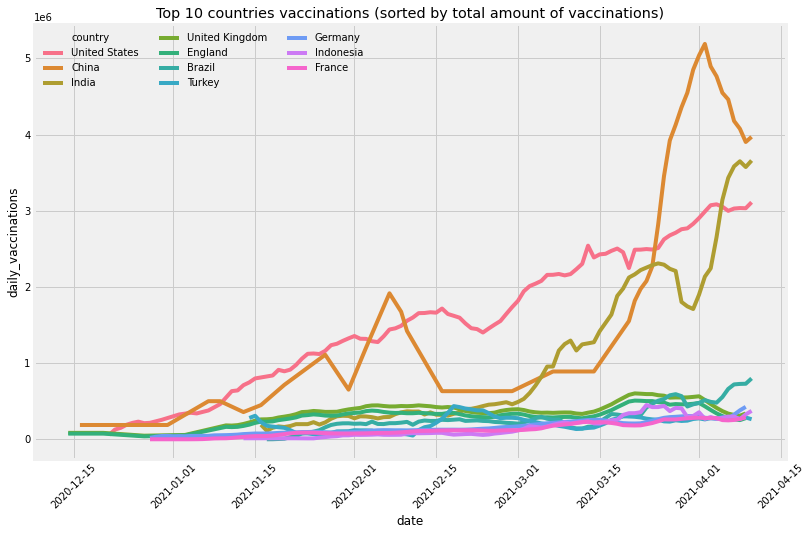

In [39]:
#plotting the top 10 countries that are sorted by total amount of vaccinations:
top_countries_sum_vaccine = daily_aggreated_vaccines.sort_values(by = 'sum_vaccinations', ascending = False).reset_index()
countries_sum = top_countries_sum_vaccine.country.to_list()
sum_plot = complete_daily_vaccinations.sort_values(by = 'sum_vaccinations', ascending = False)
top10_sum = sum_plot[sum_plot['country'].isin(countries[:10])]
top40_sum = sum_plot[sum_plot['country'].isin(countries[:40])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'country', 
    data = top10_sum)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by total amount of vaccinations)')

Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by total amount of vaccinations per million)')

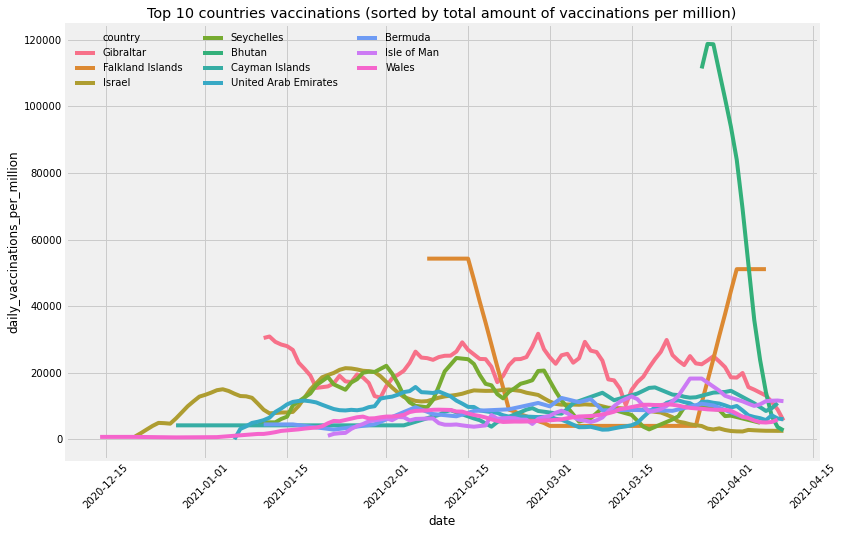

In [36]:
#Finding out how many vaccinations are there per country per million people (total value)? In other words, which countries have vaccinated the biggest proportion of their populations?
daily_vpm = all_countries.loc[:,['country', 'date',  #vpm = vaccins per million people
    'daily_vaccinations_per_million']].dropna(subset=['daily_vaccinations_per_million'])
daily_vpm["date"] = pd.to_datetime(daily_vpm["date"], format = '%Y-%m-%d')

daily_agg_vpm = daily_vpm.groupby('country').daily_vaccinations_per_million.agg(
    sum_vaccination_amount  = 'sum',
    mean_vaccination_amount = 'mean')

complete_daily_vpm = daily_vpm.merge(daily_agg_vpm, on = 'country')

sorted_sum = daily_agg_vpm.sort_values(by = 'sum_vaccination_amount', ascending = False).reset_index()
countries_sum_vpm = sorted_sum.country.to_list()

graphing_sum_vpm = complete_daily_vpm.sort_values(by = 'sum_vaccination_amount', ascending = False)
top10_sum_vpm = graphing_sum_vpm[graphing_sum_vpm['country'].isin(countries_sum_vpm[:10])]
top40_sum_vpm = graphing_sum_vpm[graphing_sum_vpm['country'].isin(countries_sum_vpm[:40])]

#plotting:

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations_per_million', hue = 'country', 
    data = top10_sum_vpm)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by total amount of vaccinations per million)')




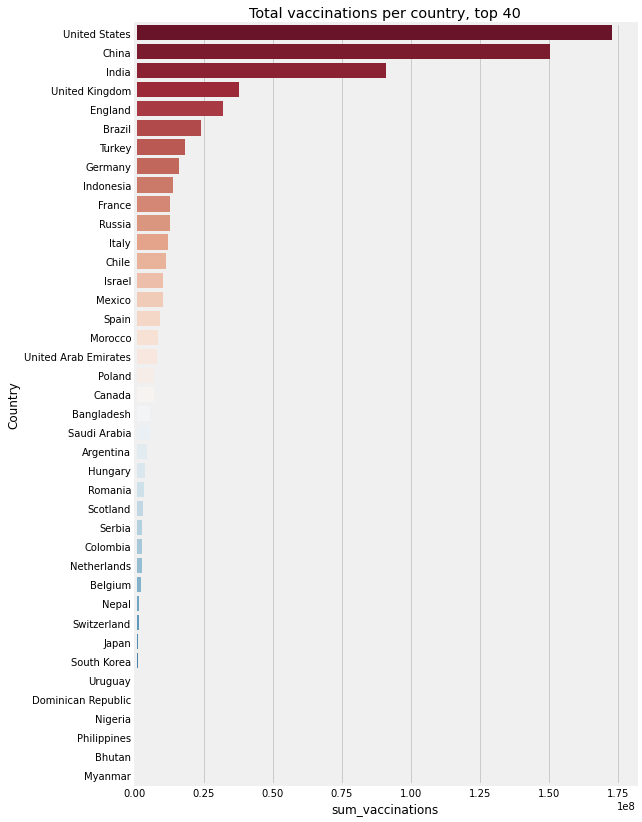

In [40]:
#plotting total vaccinations per country
plt.figure(figsize=(8,14))
sns.barplot(x=top40_sum['sum_vaccinations'], y=top40_sum['country'], palette="RdBu")
plt.xlabel("sum_vaccinations")
plt.ylabel("Country")
plt.title("Total vaccinations per country, top 40")
plt.show()

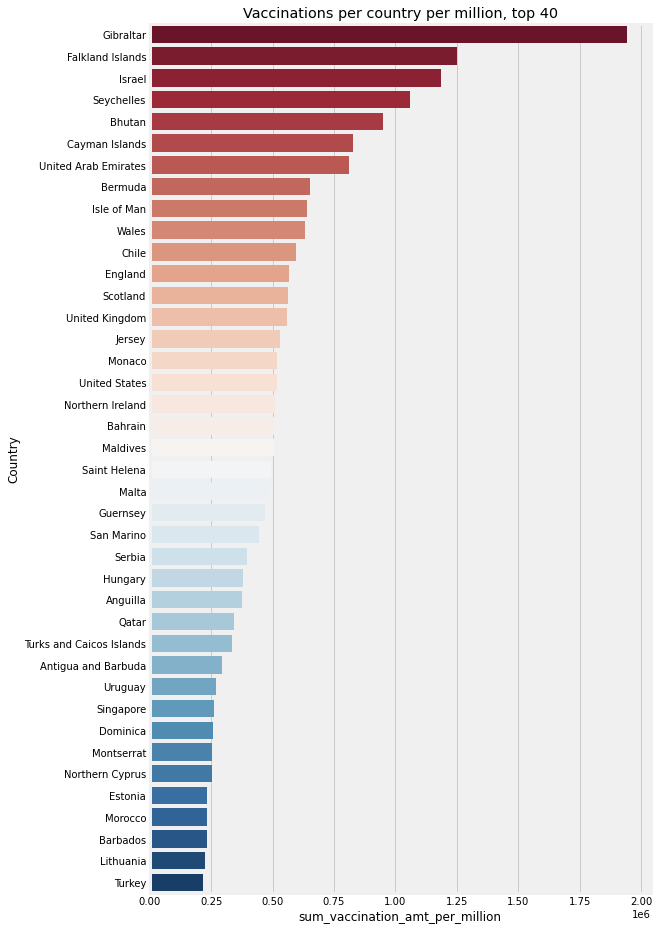

In [38]:
plt.figure(figsize=(8,16))
sns.barplot(x=top40_sum_vpm['sum_vaccination_amount'], y=top40_sum_vpm['country'], palette="RdBu")
plt.xlabel("sum_vaccination_amt_per_million")
plt.ylabel("Country")
plt.title("Vaccinations per country per million, top 40")
plt.show()

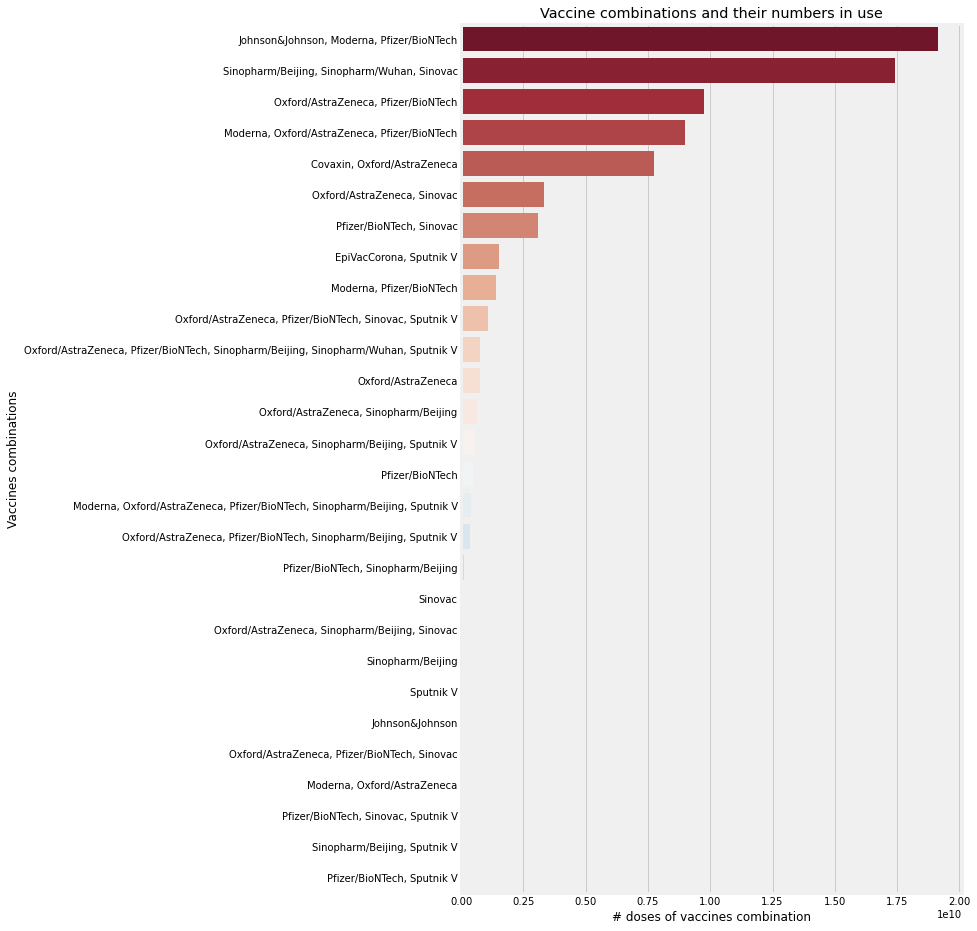

In [42]:
#plotting from the entire data:
data = complete_daily_vaccinations.groupby('vaccines')['sum_vaccinations'].sum()
data = pd.DataFrame(data).reset_index()
data = data.sort_values(by = 'sum_vaccinations', ascending = False).reset_index()

plt.figure(figsize=(8,16))
sns.barplot(x=data['sum_vaccinations'], y=data['vaccines'], palette="RdBu")
plt.xlabel("# doses of vaccines combination")
plt.ylabel("Vaccines combinations")
plt.title("Vaccine combinations and their numbers in use")
plt.show()

In [43]:
#3. What vaccines are used and in which countries?
vaccines = complete_daily_vaccinations.loc[:,['country', 'vaccines']]
vaccines = vaccines.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()
vaccines

,vaccines,country
0,"Covaxin, Oxford/AstraZeneca",[India]
1,"EpiVacCorona, Sputnik V",[Russia]
2,Johnson&Johnson,[South Africa]
3,"Johnson&Johnson, Moderna, Pfizer/BioNTech",[United States]
4,"Moderna, Oxford/AstraZeneca","[Guatemala, Honduras]"
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[Austria, Belgium, Bulgaria, Canada, Croatia, ..."
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Hungary]
7,"Moderna, Pfizer/BioNTech","[Faeroe Islands, Israel, Liechtenstein, Singap..."
8,Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
9,"Oxford/AstraZeneca, Pfizer/BioNTech","[Australia, England, Guernsey, Isle of Man, Je..."


In [44]:
#creating a function:
d = {}
for i in vaccines["vaccines"].unique():
    d[i] = [vaccines["country"][j] for j in vaccines[vaccines["vaccines"]==i].index]
d

{'Covaxin, Oxford/AstraZeneca': [array(['India'], dtype=object)],
 'EpiVacCorona, Sputnik V': [array(['Russia'], dtype=object)],
 'Johnson&Johnson': [array(['South Africa'], dtype=object)],
 'Johnson&Johnson, Moderna, Pfizer/BioNTech': [array(['United States'], dtype=object)],
 'Moderna, Oxford/AstraZeneca': [array(['Guatemala', 'Honduras'], dtype=object)],
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech': [array(['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Czechia',
         'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
         'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
         'Malta', 'Netherlands', 'Norway', 'Palestine', 'Poland',
         'Portugal', 'Romania', 'Rwanda', 'Spain'], dtype=object)],
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V': [array(['Hungary'], dtype=object)],
 'Moderna, Pfizer/BioNTech': [array(['Faeroe Islands', 'Israel', 'Liechtenstein', 'Singapore',
         'Switzerland']

In [47]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [49]:
#plotting
title = "Popular Vaccines"
data = complete_daily_vaccinations
fig = ex.choropleth(data, 
            locations="country", 
            locationmode='country names',
            color="vaccines", 
            hover_name="country", 
                   )


fig.update_layout(title=title, 
            title_x=0.5,
            legend_orientation = 'h'
)
fig.show()